In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

previous_speed = None

In [3]:
def velocity(throttle, current):
    global previous_speed
    #print(throttle, current)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a*dt # + np.random.normal(0, 0.1)
    
    if previous_speed is not None:
        print(previous_speed, current, vf)
        m1 = (current - previous_speed) / dt 
        m2 = (vf - current) / dt
        if m2 != 0:
            m3 = 0.9 * m1 + 0.1 * m2
            vf = m3 / m2 * (vf-current) + current
            print(vf)

    previous_speed = current
    
    return vf

In [4]:
kp = 100
ki = 1.5
kd = 50

In [5]:
# Variables to store previous values
prev_error = 0
integral = 0

def controller(target_speed, current_speed, dt):
    global prev_error, integral  # Keep values across function calls
    
    # Compute error
    error = target_speed - current_speed
    
    # Proportional term
    p = error
    
    # Integral term (accumulate over time)
    integral += error * dt
    
    # Derivative term (rate of change of error)
    d = (error - prev_error) / dt if dt > 0 else 0 
    
    # Compute PID output
    output = (kp * p) + (ki * integral) + (kd * d)
    
    # Store error for next derivative calculation
    prev_error = error
    
    return output

In [6]:
# def controller(target_speed, current_speed):
#     p = target_speed - current_speed
#     d = p/dt
#     i = current_speed * dt
#     return kp*p  + ki*i + kd*d

In [7]:
target = 80
current = vi
result = []
for t in np.arange(0, 100, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 100
for t in np.arange(100, 150, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

target = 50
for t in np.arange(150, 250, dt):
    throttle = controller(target, current, dt)
    current = velocity(throttle, current)
    result.append([t,throttle,current])

0 4.801200000000001 5.315225466785601
9.173682546678561
4.801200000000001 9.173682546678561 9.665870406124975
13.158135624633907
9.173682546678561 13.158135624633907 13.629993253886068
16.791329157718934
13.158135624633907 16.791329157718934 17.244277836928728
20.106498205416436
16.791329157718934 20.106498205416436 20.541871595593534
23.1336876873619
20.106498205416436 23.1336876873619 23.552732193332517
25.90006267170988
23.1336876873619 25.90006267170988 26.303939194372994
28.43018780988937
25.90006267170988 28.43018780988937 28.819974497336897
30.74627910299567
28.43018780988937 30.74627910299567 31.12297479458151
32.86843083594992
30.74627910299567 32.86843083594992 33.2329589610819
34.81482020812195
32.86843083594992 34.81482020812195 35.168032955663136
36.6018919178309
34.81482020812195 36.6018919178309 36.944574535160974
38.24452471830196
36.6018919178309 38.24452471830196 38.5773998334288
39.7561817502386
38.24452471830196 39.7561817502386 40.07991363758225
41.149046267715946


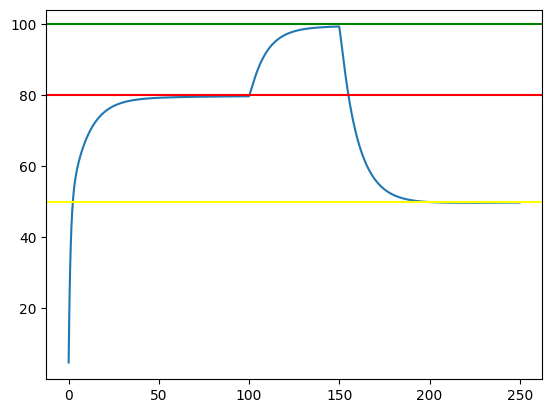

In [8]:
r = np.array(result)
plt.plot(r[:,0], r[:,2])
plt.axhline(80, color="red")
plt.axhline(100, color="green")
plt.axhline(50, color="yellow")

In [9]:
r

array([[0.00000000e+00, 4.80120000e+04, 4.80120000e+00],
       [1.00000000e-01, 5.14255982e+03, 9.17368255e+00],
       [2.00000000e-01, 4.93029424e+03, 1.31581356e+01],
       ...,
       [2.49700000e+02, 2.50788027e+02, 4.98334726e+01],
       [2.49800000e+02, 2.50788399e+02, 4.98337195e+01],
       [2.49900000e+02, 2.50788755e+02, 4.98339661e+01]], shape=(2500, 3))